In [1]:
import os
import tensorflow as tf
import xarray as xr
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import data_tools

In [2]:
tf.__version__

'2.0.0-rc0'

In [3]:
filename = 'output1.tif'

data = data_tools.read_raster(filename, band=None)

In [4]:
data[0]

array([[[18,  4,  7, ..., 29, 32, 36],
        [24, 10, 12, ..., 32, 32, 33],
        [27, 12, 13, ..., 35, 32, 30],
        ...,
        [20, 29, 27, ..., 24, 25, 22],
        [27, 35, 28, ..., 24, 26, 25],
        [41, 44, 30, ..., 24, 27, 27]],

       [[38, 24, 27, ..., 57, 60, 64],
        [44, 30, 32, ..., 60, 60, 61],
        [47, 32, 33, ..., 63, 60, 58],
        ...,
        [47, 56, 54, ..., 48, 49, 46],
        [55, 61, 54, ..., 48, 50, 49],
        [69, 70, 56, ..., 48, 51, 51]],

       [[27, 13, 16, ..., 32, 37, 41],
        [33, 19, 21, ..., 35, 37, 38],
        [36, 21, 22, ..., 38, 37, 35],
        ...,
        [32, 41, 39, ..., 35, 36, 33],
        [41, 48, 41, ..., 35, 37, 36],
        [57, 57, 43, ..., 35, 38, 38]]], dtype=uint8)

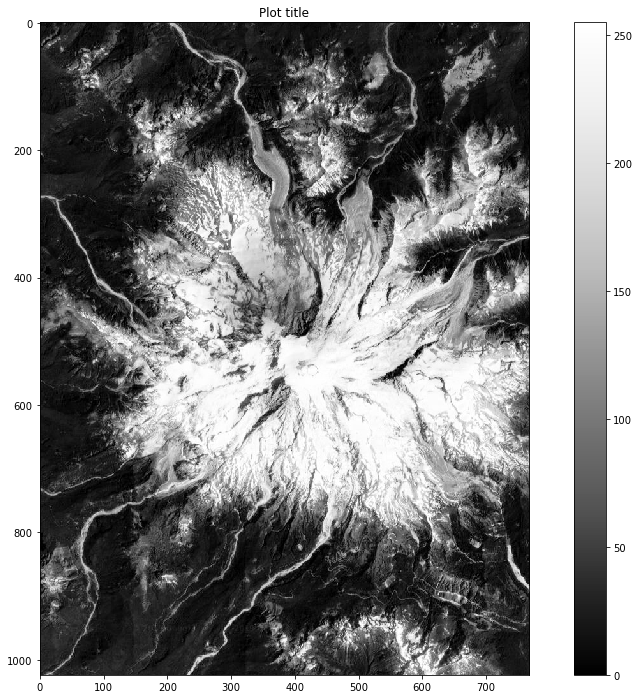

In [5]:
data_tools.plot_me(data[0][0])

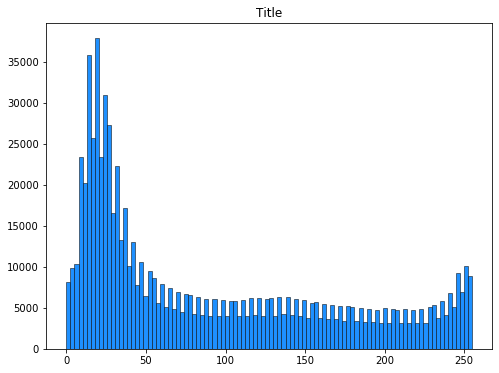

In [6]:
data_tools.histo_me(data[0][0])

In [8]:
print(np.shape(mask))

(1024, 768)


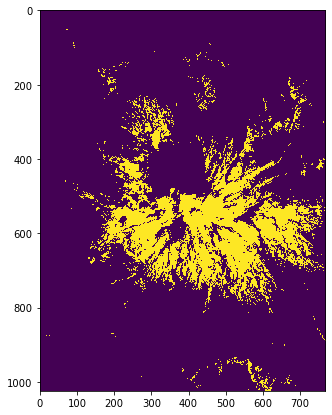

In [10]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.imshow(mask)

plt.show()

Rough threshold values for snow:
- R > 1000, channel 2
- G > 1000, channel 1
- B > 1000, channel 0
- NIR < 100, channel 3

Reading in data will result in an array of the shape (4, 8000, 8000).

We are going to start with the green band where snow is the most reflective.

In [11]:
filenames = os.listdir('/home/jovyan/data/planet_flat/')

In [12]:
filename_tifs = [f for f in filenames if f.endswith("Analytic_refl.tif")]

In [13]:
sample_files = filename_tifs[:10]
sample_files

['703947_1060718_2017-08-22_1035_BGRN_Analytic_refl.tif',
 '794418_1060719_2017-09-28_0f35_BGRN_Analytic_refl.tif',
 '2574848_1060718_2019-08-04_0f4e_BGRN_Analytic_refl.tif',
 '2574618_1060618_2019-08-04_0f3d_BGRN_Analytic_refl.tif',
 '2548533_1060719_2019-07-25_0f15_BGRN_Analytic_refl.tif',
 '2575093_1060719_2019-08-04_1039_BGRN_Analytic_refl.tif',
 '644798_1060618_2017-07-25_103d_BGRN_Analytic_refl.tif',
 '644800_1060619_2017-07-25_100b_BGRN_Analytic_refl.tif',
 '644800_1060718_2017-07-25_100b_BGRN_Analytic_refl.tif',
 '2631559_1060618_2019-08-27_1032_BGRN_Analytic_refl.tif']

In [14]:
def apply_mask(root_dir, filename, threshold=9000, band=0):
    data = data_tools.read_raster(os.path.join(root_dir,filename))[0]##
#    data[data==0]=-9999
    mask = np.zeros(np.shape(data))
#     data = np.ma.masked_equal(data, 0) #returns masked array of data != 0
    mask[np.where(data > threshold)] = 1
    return mask

In [15]:
root_dir = '/home/jovyan/data/planet_flat/'
threshold = 2000
band = 1
sample_masks = []
for file in sample_files:
    mask = apply_mask(root_dir, file, threshold=threshold, band=band)
    sample_masks.append(mask)

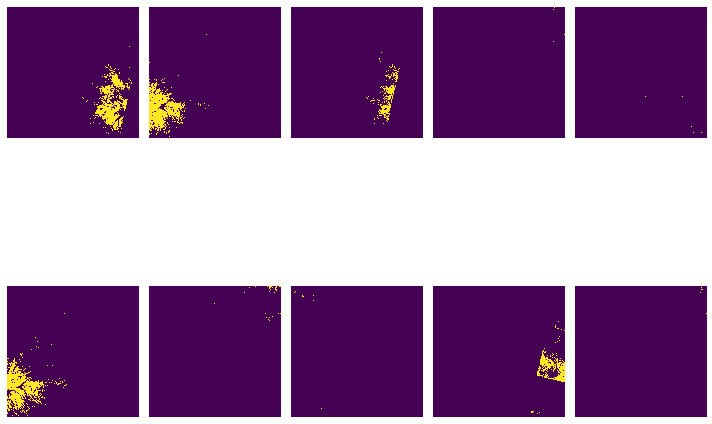

In [16]:
fig = plt.figure(figsize=(10, 10))
columns = 5
rows = 2

for i, img in enumerate(sample_masks, 1):
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img)
plt.tight_layout()
plt.show()

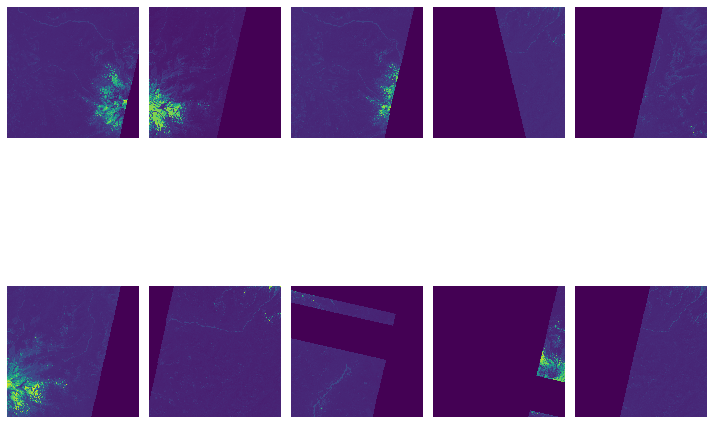

In [17]:
sample_arr = []
for file in sample_files:
    data = data_tools.read_raster(os.path.join(root_dir,file))[0]
    sample_arr.append(data)
    
fig = plt.figure(figsize=(10, 10))
columns = 5
rows = 2

for i, img in enumerate(sample_arr, 1):
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img)
plt.tight_layout()
plt.show()